<a href="https://colab.research.google.com/github/ChristianKitte/HelloSparkBasics/blob/main/SparkWordCount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aufgabe und Einleitung

**Aufgabe** 

Die hier zu lösende Aufgabe ist das finden des 25. am häufigsten vorkommende Wort in den gesammelten Werken von Shakespeare.

***(Die eigentliche Lösung findet sich am Ende)***

---

Bei der Umsetzung liegt der Fokus auf die Implementierung und Umsetzen der Aufgabe mit Spark, nicht auf das Finden einer komplett eigenständigen und gänzlich neuen Lösung. Die Aufgabe ist daher sehr grundlegend. Primärer Fokus dieser Aufgabe ist somit die Ausführung von Code mit Spark, also die lauffähige Implementierung von Spark.

Dies Notebook nutzt daher auch das im Internet verfügbare Wissen, um die Aufgabe zu lösen. Hierbei wird für die Vertiefung jedoch auch immer eine Verbindung zu den ursprünglichen Quellen angegeben.



---



Weitere interessante Links zum Thema Spark mit Colab sind:

https://www.analyticsvidhya.com/blog/2020/11/a-must-read-guide-on-how-to-work-with-pyspark-on-google-colab-for-data-scientists/

https://www.analyticsvidhya.com/blog/2020/10/data-engineering-101-data-sources-apache-spark/?utm_source=blog&utm_medium=working-with-pyspark-on-google-colab-for-data-scientists


# Installation von Spark und Tools

**Installation von Spark**


---


Neben der einfachen Verfügbarkeit und guten Rechenleistung bietet Colab auch die Möglichkeit, Dateien zu speichern und beliebige Anwenungen zu installieren. Selbstverständlich sind diese nicht dauerhaft verfügbar, was jedoch in vielen Fällen, gerade bei der Weitergabe von Code nicht zwingend notwendig ist.

Somit ist die Angabe der notwendigen Installationsschritte eine wichtige Anforderung.



---


Im ersten Schritt muss Spark im Contaxt von Colab installiert werden. Da Colab im Hintergrund auf Linux basiert, sind die Schritte hierzu analog zu denen einer Installation unter Linux. Insbesondere unter Colab, welches naturgemäß Python unterstützt, kann dessen Verfügbarkeit als gegeben angenommen werden.

https://archive.apache.org/dist/spark/spark-3.1.2/

https://github.com/gahogg/YouTube/blob/master/PySpark%20In%2015%20Minutes.ipynb

https://newbedev.com/python-spark-in-colab-code-example


In [1]:
# Installation  von Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

print("Java ist installiert...")

# Download und Entpacken von Spark (Versionsnummer anpassen!)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz

print("Spark ist verfügbar...")

# Setzen der Systemvariablen für Java und Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

print("Umgebungsvariablen sind gesetzt...")

Java ist installiert...
Spark ist verfügbar...
Umgebungsvariablen sind gesetzt...




---



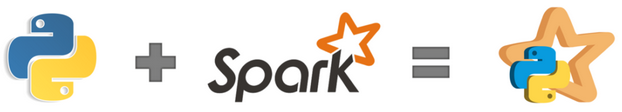

(Quelle: https://databricks.com/de/glossary/pyspark)


---

Installation von PySpark und Findspark. PySpark bildet hierbei die Schnittstelle von Python zu Spark. Es ermöglicht also die Nutzung von Spark in Python Programmen.

Informationen hierzu findet man hier :

https://spark.apache.org/docs/latest/api/python/

https://databricks.com/de/glossary/pyspark

FindSpark ist eine Hilfsbibliothek, welche es ermöglicht, auch dann mit Spark und Standardbibliotheken zu arbeiten, wenn die Systemvariablen nicht korrekt gesetzt wurden, was hier jedoch der Fall ist.

Information hierzu findet man hier :

https://github.com/minrk/findspark


In [2]:
# Installieren von findspark
!pip3 install -q findspark

# Installieren von PySpark
!pip3 install pyspark

import findspark
findspark.init()

print("")
print("Verszeichnis von Spark: ", findspark.find())

print("")
print("PySpark und FindSpark wurden installiert...")

     |████████████████████████████████| 212.4MB 72kB/s 
     |████████████████████████████████| 204kB 22.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=db089f69bbfd113d0dccb507bc8f363dc8296005cd9f090d4d9c8f2167eac0f9
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark

Verszeichnis von Spark:  /content/spark-3.1.2-bin-hadoop3.2

PySpark und FindSpark wurden installiert...


# Spark Session (spark) und UI anlegen

Nach der Installation kann eine Spark Session erzeugt werden, um hieraus später einen Context erzeugen zu können.

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

print("")
print("Die Spark Session wurde erzeugt...:")
print("")

spark


Die Spark Session wurde erzeugt...:





---

Weiter kann eine UI für Spark gestartet werden, wofür weitere Software notwendig ist. Für die hier zu lösende Aufgabe der Zählens von Wörtern ist dies jedoch nicht zwingend notwendig. Es ist lediglich interessant.

Dieser Block / Die Installation muss zwei Mal ausgeführt werden! Beim zweiten Mal muss die angezeigte Frage mit "y" bestätigt werden und es erscheint am Ende eine URL mit der Bezeichnung "public_url". Diese führt zu einer Web UI (Zugriff via Browser).

In [5]:
# Zwei Mal ausführen und beim zweiten mal mit y bestätigen !!!

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

print("UI wurde angelegt...")

--2021-07-10 12:15:54--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.215.21.243, 52.45.133.242, 3.95.52.0, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.215.21.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  9.36MB/s    in 1.4s    

2021-07-10 12:15:56 (9.36 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://76dd8171fab0.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"h

# Benötigte Methoden anlegen

Für größere Dateien ist es sinnvoll und notwendig, Spark einen lokalen Zugriff auf Dateien zu geben. Zum Laden und Speichern von Dateien wird hierzu eine Funktion angelegt, welche als Argument eine URL und einen Speicherort übergeben bekommt.


---


Gerade bei größeren Dateien kann es manchmal zu Problemen kommen. Ein effizienter Weg wird hier vorgestellt:

https://www.codegrepper.com/code-examples/python/download+any+file+from+link+colab

In [6]:
import requests 

def get_file_from_url(file_url, place_to_save):
  req = requests.get(file_url, stream = True) 

  with open(place_to_save, "wb") as file: 
	  for block in req.iter_content(chunk_size = 1024): 
		  if block: 
			  file.write(block) 
     
  print("Die Datei wurde angelegt: ", file_url)

print("Die Funktion get_file_from_url wurde angelegt...")

Die Funktion get_file_from_url wurde angelegt...




---

Weiter wird eine Funktion angelegt, welche nur einen bestimmten Bereich der Datei selektiert und in eine neue Datei speichert. Der Bereich wird durch Angabe der ersten und letzten Zeile bestimmt (inklusive).

In [7]:
def cut_file(start, end, file, backup):
  try:
    with open(file, "r") as source:
      lines = source.readlines()
    
    source.close()
  
    start_count = start
    end_count = end

    print("Start: ", start_count)
    print("Ende: ", end_count)

    current_count = 0
  
    with open(backup, "w") as target:
      for line in lines:
        if current_count >= start_count and current_count <= end_count:
          target.write(line)

        current_count = current_count + 1   
    
    target.close()

    print("Fertig...")

  except ValueError:
    print("Fehler",ValueError)

print("Die Funktion cut_file wurde angelegt...")

Die Funktion cut_file wurde angelegt...


# Finale Lösung (Wörter zählen)



---


Abschließend erfolgt hier die finale Lösung der Aufgabe auf Basis des bisherigen Codes.

In [8]:
# Datei von der Quelle nach Colab laden

file_url = "https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt"
place_to_save = "/content/shakespeare.txt"

get_file_from_url(file_url, place_to_save)

print("Datei wurde geladen: ", file_url)

Die Datei wurde angelegt:  https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt
Datei wurde geladen:  https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt


In [9]:
# Unnötige Zeilen am Ende und am Start entfernen

file_source = "/content/shakespeare.txt"
file_target = "/content/shakespeare_neu.txt"

cut_file(244,124438,file_source, file_target)

print("Datei wurde beschnitten...")

Start:  244
Ende:  124438
Fertig...
Datei wurde beschnitten...


Im letzten Schritt werden die Wörter gezählt, sortiert und ausgegeben. Der Code hierfür enthält Anleihen aus den unten genannten Quellen. 




---


Für mich waren die folgenden Quellen sehr lehrreich:

https://www.kaggle.com/kewagbln/shakespeare-word-count-with-spark-python


https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/3328674740105987/4033840715400609/6441317451288404/latest.html



---


Insbesondere möchte ich auf die folgenden Seiten hinweisen. Sie enthalten eine unglaubliche Fülle an Informationen und Wissen zum Thema DataScience und seinem Umfeld wie Apache Flink, Apache Spark, Python, Scale usw. :

https://sparkbyexamples.com

https://data-flair.training

https://data-flair.training/blogs/data-science-tutorials-home/


In [10]:
# from pyspark.sql.functions import split, explode,col

# 1) Import der notwendigen Bibliotheken
from pyspark import SparkContext 
from pyspark import SparkConf
from pyspark.sql import SQLContext 

# 2) Erzeugen neuer Kontexte
# https://data-flair.training/blogs/learn-apache-spark-sparkcontext/
sqlc = SQLContext(spark)
sc = spark.sparkContext

# 3) Einlesen der Datei und Ausführen einiger Umformungen/Ersetzungen. Als Ergebnis erhalten 
# wir einen RDD  
# (Transformation)
# https://sparkbyexamples.com/spark/spark-read-text-file-rdd-dataframe/#rdd-textfile
text_file=sc.textFile("/content/shakespeare_neu.txt") \
            .map( lambda x: x.replace(',',' ').replace('.',' ').replace('-',' ').lower()) \

# 4) Hier geschehen mehrere Dinge:
#
# a) flatMap vereinigt die Rows/Maps und arbeitet somit eigentlich Spaltenbasiert
# (Transformation)
# b) map wendet eine Lambdafunktion auf jedes einzelen Element (hier rows) eines RDD 
# oder DataFrames an, hier: erzeugen von Tupeln für jedes Wort (Word (key), Value (1))
# (Transformation)
# c) reduceByKey verkürzt die Liste von key-value Paaren und zählt jeweils die Values (jedes 
# einzelne Wort hat als Value die 1...) zusammen 
# (Transformation)
#
# Als Ergebnis der Transformationen erhalten wir einen RDD
#
# https://data-flair.training/blogs/apache-spark-map-vs-flatmap/
# https://sparkbyexamples.com/spark/spark-map-vs-flatmap-with-examples/
# https://sparkbyexamples.com/spark/spark-flatmap-usage-with-example/
# https://sparkbyexamples.com/pyspark/pyspark-map-transformation/
# https://sparkbyexamples.com/apache-spark-rdd/spark-reducebykey-usage-with-examples/
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)

# 5) Sortieren (sortBy ist eigentlich eine Kurzform von sortByKey, welche in bestimmten 
# Szenarien verwendet werden kann, siehe Links)
# (Transformation)
# https://titanwolf.org/Network/Articles/Article?AID=ac8a7a64-00d0-43d1-ba4c-e426ca670471#gsc.tab=0
# https://sparkbyexamples.com/apache-spark-rdd/spark-sortbykey-with-rdd-example/
sorted_counts = counts.sortBy(lambda wordCounts: wordCounts[1], ascending=False)

# 6) Ausgabe der sortierten Liste (Python Code). Diese Liste ist jedoch das Ergebnis eines 
# collect Befehls auf dem RDD sorted_counts. Hier wird also das Ergebnis der zuvor defnierten
# Transformationen "gesammelt" und zur Verfügung gestellt. Vorher können die Anweisungen von Spark 
# optimiert werden. Eines der Ziele von Spark ist ja gerade die möglichst späte Ausführung, um 
# Optimierungen zu ermöglichen.
# (Action)
i = 0
for word, count in sorted_counts.collect()[0:30]:
    print("{} : {} : {} ".format(i, word, count))
    i += 1

print("")
print("Fertig...")

0 :  : 679850 
1 : the : 27507 
2 : and : 26705 
3 : i : 20191 
4 : to : 19294 
5 : of : 18076 
6 : a : 14502 
7 : you : 12957 
8 : my : 12468 
9 : that : 10950 
10 : in : 10903 
11 : is : 9473 
12 : not : 8443 
13 : for : 8181 
14 : with : 7965 
15 : it : 7212 
16 : be : 6963 
17 : me : 6962 
18 : your : 6865 
19 : his : 6825 
20 : this : 6276 
21 : but : 6267 
22 : he : 6102 
23 : as : 5927 
24 : have : 5838 
25 : thou : 5378 
26 : so : 4948 
27 : will : 4858 
28 : him : 4625 
29 : by : 4386 

Fertig...


Das 25. am häufigsten vorkommende Wort steht an der 25. Stelle der nullbasierten, absteigenden Liste und lautet "thou" mit 5378 Vorkommen. Warum an der 25. Stelle, wenn die Liste nullbasiert ist? Die Antwort liegt darin, dass an erster Stelle das einfache Leerzeichen steht. Ein Leerzeichen trennt Wörter, ist aber keins.